<a href="https://colab.research.google.com/github/RhittC/Algorithmics/blob/main/Algo_HW_Rhitt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.1 - Holiday Homework - Rhitt**

- Task descriptions taken from the PPT, then formatted in markdown and latex
- When running times on local machine are provided, $0s$ indicates code was too fast to be measured
- Comments can be made with `Ctrl+Alt+M`

## Task 1 - River Crossing Problem
Defining algorithms with Graphs<br>
<br>
A farmer returns from the market, where he bought a chicken, a
bag of wheat and a dog. On the way home he must cross a river.

- His boat is very small and won't fit more than one of his
purchases.
- He cannot leave the chicken alone with the wheat (because
the chicken would eat it).
- He cannot leave the chicken alone with the dog (because the
chicken would be eaten).

How can the farmer get everything on the other side in this river
crossing puzzle? Model the solution using a graph from initial to goal state.

Algorithm to solve generalised problem with arbitrary constraint matrix:

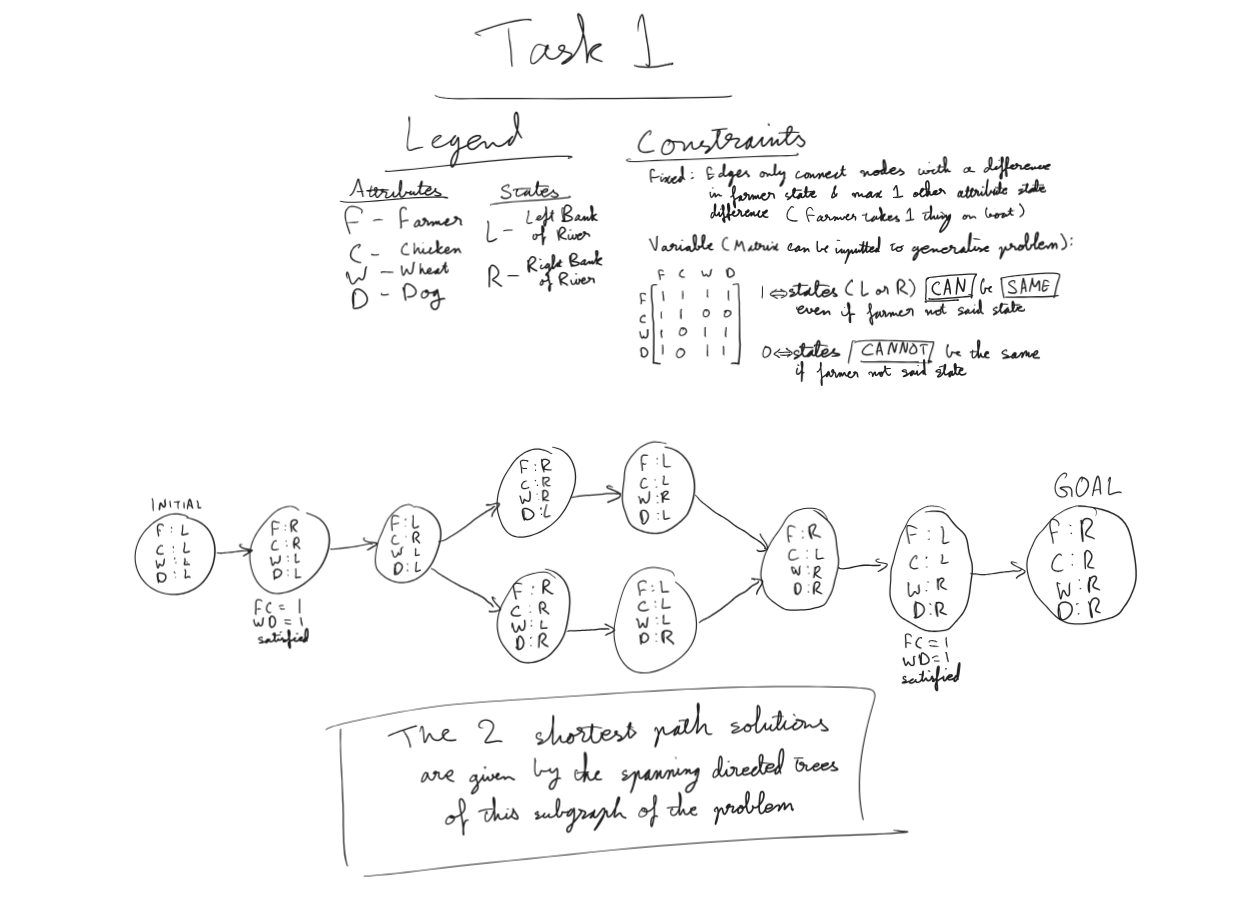

In [ ]:
# Assumption:
#
# "chicken cannot be left alone with wheat" means only that farmer must accompany them
# That is, chicken and wheat on same side without farmer => illegal ...
# ... regardless of whether other non-farmers are present
import queue

class Node:
    def __init__(self, predecessor, states):
        self.predecessor = predecessor
        self.states = states    # list of attribute states, in sequential order

    def isLegal(self, _states):
        for i in range(n):
            for j in range(i+1, n):
                if _states[0] != _states[i] == _states[j] and constraints[i][j] == 0:
                    return False
        return True

    def toggle(self, _states, i):
        return _states[:i] + ('R' if _states[i] == 'L' else 'L') + _states[i+1:]

    def neighbours(self):
        neighbours = []
        _states = self.toggle(self.states, 0)   # Farmer must cross - otherwise, no progress is made

        # Farmer taking something across
        for i in range(1, n):
            if _states[i] != _states[0]:        # item currently on same side as Farmer
                candidate = self.toggle(_states, i)
                if self.isLegal(candidate):
                    neighbours.append(Node(self, candidate))

        # Farmer crossing alone
        if self.isLegal(_states):
            neighbours.append(Node(self, _states))

        return neighbours

def bfs(q, visited):
    while not q.empty():
        current = q.get()
        if current.states not in visited:
            visited[current.states] = True
            if current.states == 'R'*n:
                return current

            # populate queue with next bfs level
            for neighbour in current.neighbours():
                q.put(neighbour)

    return None

def printSolution(node):
    if node is None:
        print("INITIAL", end=" -> ")
    else:
        printSolution(node.predecessor)
        print(node.states, end=" -> ")


# main
debug = False
if debug:
    n = 4
    constraints = [
        [1, 1, 1, 1],
        [1, 1, 0, 0],
        [1, 0, 1, 1],
        [1, 0, 1, 1]
    ]
else:
    n = int(input("Input problem size (including farmer): "))

    print("Input constraint matrix - with row 1 and column 1 being farmer:")
    constraints = [[int(i) for i in input().split()] for j in range(n)]

q = queue.Queue()
q.put(Node(None, 'L'*n))
visited = {}    # dictionary for O(1) lookup

solution = bfs(q, visited)
if solution is None:
    print("No solution exists")
else:
    print("Solution exists\n\nShortest path:")
    printSolution(solution)
    print("GOAL")

Input problem size (including farmer): 4
Input constraint matrix - with row 1 and column 1 being farmer:
1 1 1 1
1 1 0 0
1 0 1 1
1 0 1 1
Solution exists

Shortest path:
INITIAL -> LLLL -> RRLL -> LRLL -> RRRL -> LLRL -> RLRR -> LLRR -> RRRR -> GOAL


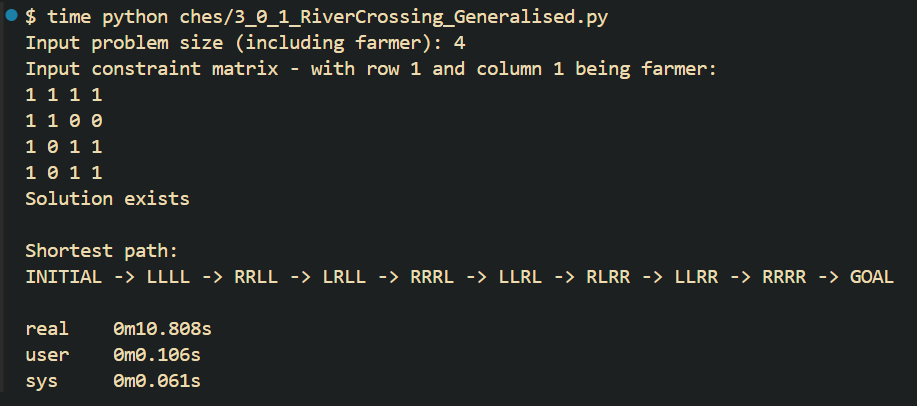

## Task 2 - Egyptian Fractions
Every positive proper fraction can be represented as sum of
unique unit fractions.<br>
A fraction is a unit fraction if the numerator is $1$ and the
denominator is a positive integer, for example $\frac{1}{3}$ is a unit
fraction.<br>
Such a representation of a sum of unique unit fractions is called
an Egyptian Fraction as it was used by ancient Egyptians.<br><br>
Following are few examples:
- Egyptian Fraction Representation of $\frac{2}{3}$ is $\frac{1}{2} + \frac{1}{6}$
- Egyptian Fraction Representation of $\frac{6}{14}$ is $\frac{1}{3} + \frac{1}{11} + \frac{1}{231}$
- Egyptian Fraction Representation of $\frac{12}{13}$ is $\frac{1}{2} + \frac{1}{3} + \frac{1}{12} + \frac{1}{156}$

<br><br><br>
**Exhaustive Search Algorithm for finding
Egyptian Fractions:** <br>
For a given number of the form $\frac{X}{Y}$ where $X < Y$, first find
the greatest possible unit fraction, then repeat for the
remaining part.<br><br>

Eg: consider $\frac{3}{7}$<br>
We first try $\frac{1}{2}$, but $\frac{3}{7} < \frac{1}{2}$<br>
We then try $\frac{1}{3}$, and $\frac{3}{7} > \frac{1}{3}$ so $\frac{3}{7}-\frac{1}{3} = \frac{9}{21}-\frac{7}{21} = \frac{2}{21}$<br>
We then try $\frac{1}{4}$, but $\frac{2}{21} < \frac{1}{4}$<br>
We then try $\frac{1}{5}$, but $\frac{2}{21} < \frac{1}{5}$<br>
$\cdots$<br>
$\cdots$<br><br>
**Exhaustive search tries out
all the possible options.**

<br><br><br>
**Greedy Algorithm for Egyptian Fractions:**<br>
For a given number of the form $\frac{X}{Y}$ where $X < Y$, first find the
greatest possible unit fraction, then repeat for the remaining part.<br><br>
Eg: consider $\frac{3}{7}$, find the nearest unit fraction less than $\frac{3}{7}$, think
about how many times $3$ goes into $7$, then always round up, the
ceiling function always rounds up.<br>

$\lceil\frac{7}{3}\rceil = 3$, so try $\frac{1}{3}$,
$\frac{3}{7}-\frac{1}{3}=\frac{9}{21}-\frac{7}{21}={21}$<br>

$\lceil\frac{21}{2}\rceil=11$, so try $\frac{1}{11}$,
$\frac{2}{21}−\frac{1}{11}=\frac{22}{231}-\frac{21}{231}=\frac{1}{231}$<br>
Note: ceiling is a function that always rounds up eg. $\lceil\frac{3}{7}\rceil$
will return $1$.<br><br>
**Greedy tries out the next best possible option.**


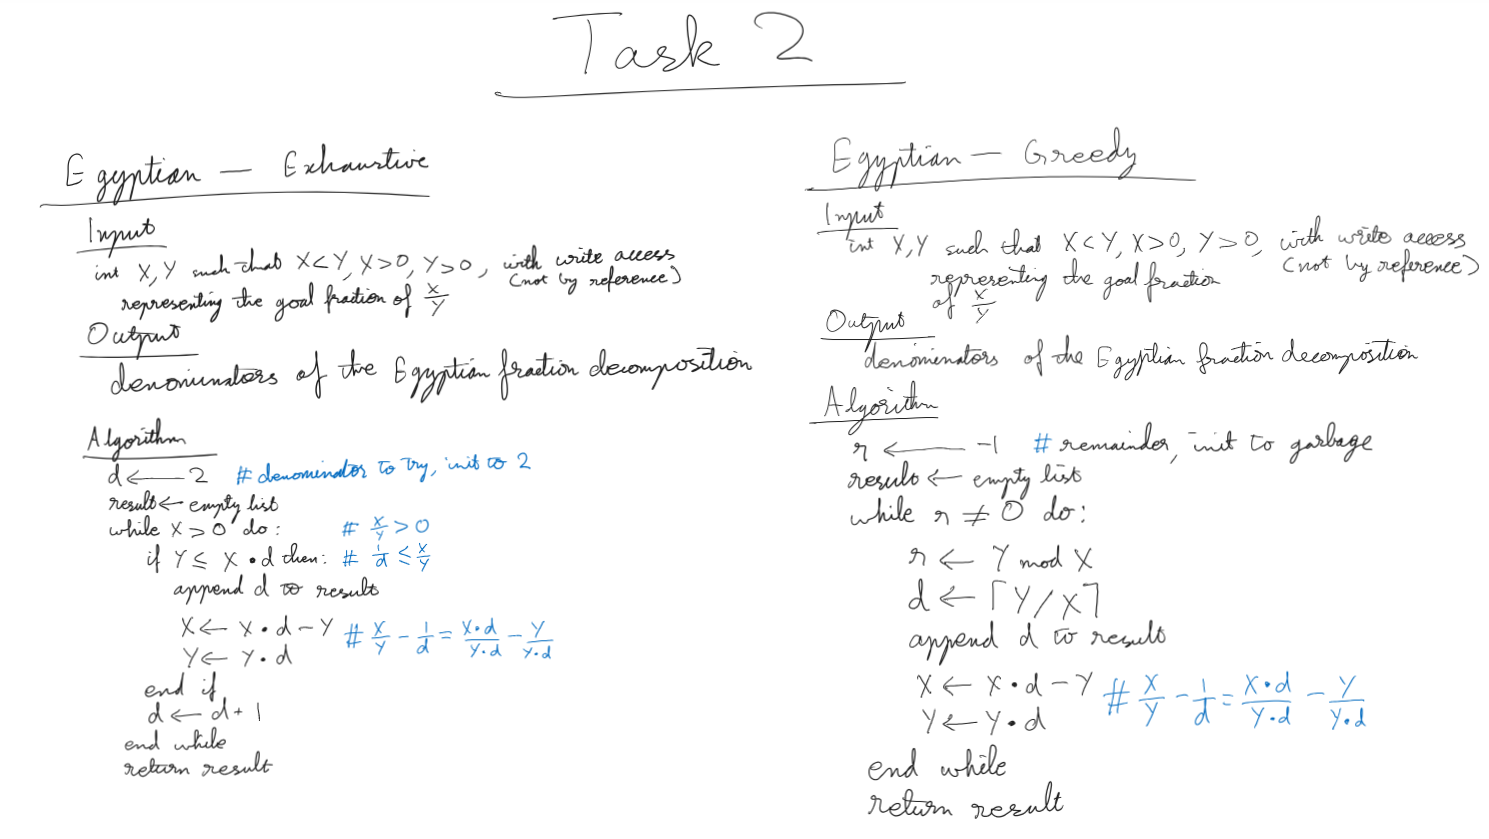

In [ ]:
import time

def exhaustive(X, Y):
    d = 2               # keep testing against 1/d, init to 1/2
    result = []
    while X > 0:  # X/Y > 0
        if Y <= X * d:           # 1/d <= X/Y
            result.append(f"1/{d}")
            # X/Y -= 1/d
            X = X*d - Y
            Y = Y*d
        d += 1
    return result

def greedy(X, Y):
    r = -1
    result = []
    while r != 0:
        r = Y % X
        d = (Y - r)//X + (1 if r > 0 else 0)    # ceil(Y/X)   # Y-r used over Y for clarity, despite equivalent results for d
        result.append(f"1/{d}")
        # X/Y -= 1/d
        X = X*d - Y
        Y = Y*d
    return result

X, Y = 99, 100
print(f"X/Y = {X}/{Y}")

start = time.time()
print(f"Exhaustive:\n{exhaustive(X, Y)}\nExecuted in {time.time() - start:.20E} secs\n")

start = time.time()
print(f"Greedy:\n{greedy(X, Y)}\nExecuted in {time.time() - start:.20E} secs")

X/Y = 99/100
Exhaustive:
['1/2', '1/3', '1/7', '1/73', '1/9018', '1/230409900']
Executed in 2.65410149097442626953E+01 secs

Greedy:
['1/2', '1/3', '1/7', '1/73', '1/9018', '1/230409900']
Executed in 1.06573104858398437500E-04 secs


 ### Observations:
 greedy algorithm ($0s$ local, $0.00011s$ collab) is always MUCH faster than exhaustive search ($21s$ local, $27s$ collab)<br>for $\frac{X}{Y}=\frac{99}{100}$

 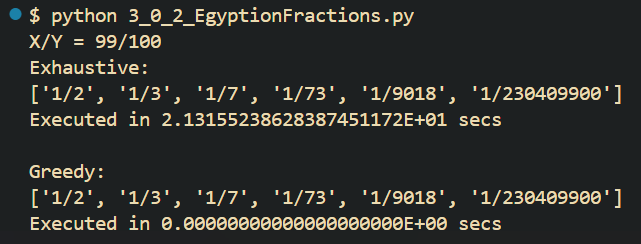

## Task 3 - Snap! and Python

- Create code in Snap! and SnapApps/Edgy that adds the
consecutive integers $1,\cdots,100$ and prints the result

- Create code in Python/Trinket that adds the consecutive
integers $1,\cdots,100$ and prints the resulting sum

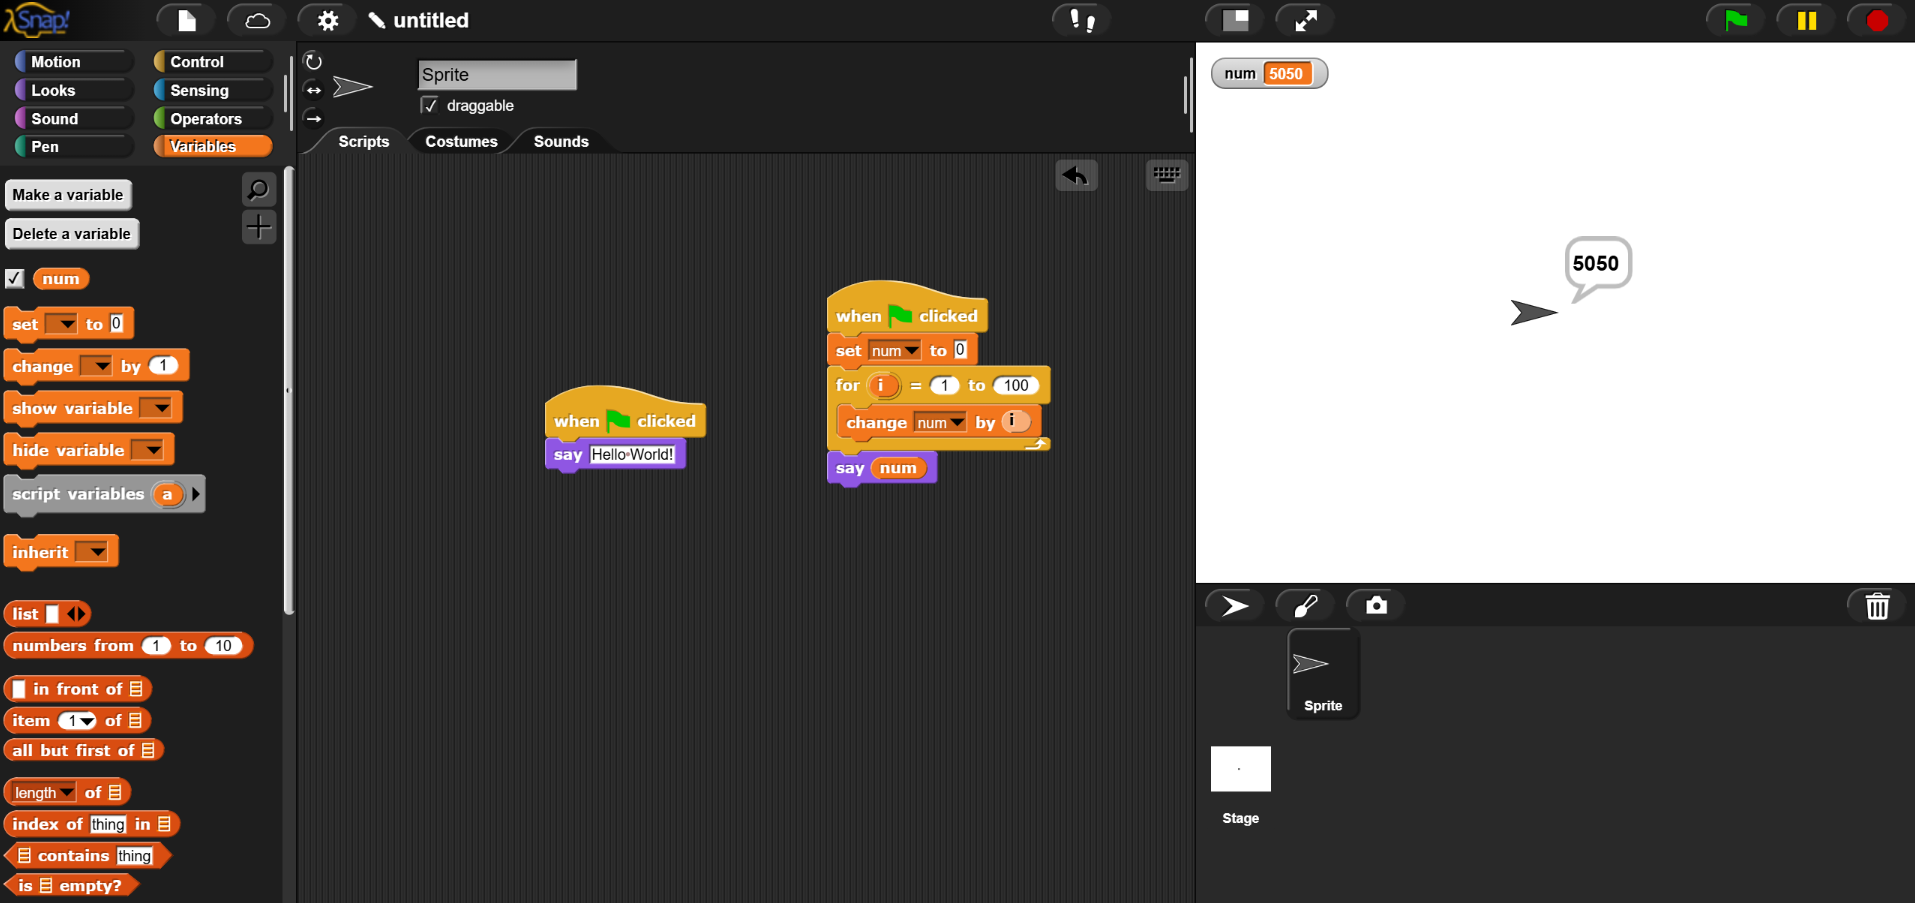

In [ ]:
import time

# inputs
first = 1
n = 100     # number of terms
step = 1


last = first + (n-1)*step   # preliminary calculation
print(f"Sum of {n} terms from {first} to {last}, with step {step}")

# O(n) naive algorithm - summing all terms individually
start = time.time()
print(f"O(n) naive algorithm:\n{sum(range(first, last + 1, step))}\n{time.time() - start:.20E} secs\n")

# O(1) algebraic algorithm - using formula for sum of arithmetic series
start = time.time()
print(f"O(1) algebraic algorithm:\n{n * (first + last) // 2}\n{time.time() - start:.20E} secs")

Sum of 100 terms from 1 to 100, with step 1
O(n) naive algorithm:
5050
8.39233398437500000000E-05 secs

O(1) algebraic algorithm:
5050
6.34193420410156250000E-05 secs


### Observations:
No significant difference in time for small $n$ like $100$

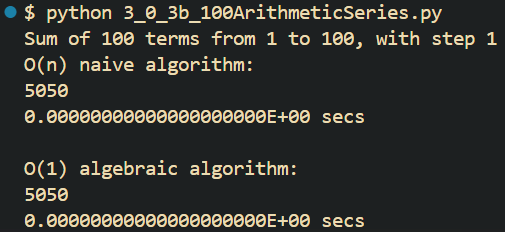